In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
T = np.array([[0., 0., 1/4., 0., 0.], 
              [0., 0., 1/4., 0., 0.], 
              [1/2., 1., 0., 1/2., 0.], 
              [0., 0., 1/4., 0., 0.], 
              [1/2., 0., 1/4., 1/2., 1.]])

In [3]:
T

array([[0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.5 , 1.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.5 , 0.  , 0.25, 0.5 , 1.  ]])

In [4]:
eigvals, eigvecs = np.linalg.eig(T)

In [5]:
print(eigvals)

[ 1.00000000e+00 -7.07106781e-01 -4.46691295e-17  7.07106781e-01
  0.00000000e+00]


In [6]:
print(eigvecs)

[[ 0.00000000e+00  3.01108713e-01 -5.00000000e-01 -1.49119981e-01
   7.07106781e-01]
 [ 0.00000000e+00  3.01108713e-01  5.00000000e-01 -1.49119981e-01
   0.00000000e+00]
 [ 0.00000000e+00 -8.51664052e-01  3.31742580e-17 -4.21774998e-01
   0.00000000e+00]
 [ 0.00000000e+00  3.01108713e-01 -5.00000000e-01 -1.49119981e-01
  -7.07106781e-01]
 [ 1.00000000e+00 -5.16620877e-02  5.00000000e-01  8.69134941e-01
   0.00000000e+00]]


In [7]:
eigvecs[:,0]

array([0., 0., 0., 0., 1.])

In [25]:
A = T - np.eye(5)
A[4] = [1,1,1,1,1]
print(A)

[[-1.    0.    0.25  0.    0.  ]
 [ 0.   -1.    0.25  0.    0.  ]
 [ 0.5   1.   -1.    0.5   0.  ]
 [ 0.    0.    0.25 -1.    0.  ]
 [ 1.    1.    1.    1.    1.  ]]


In [35]:
ps = np.linalg.solve(A, [0,0,0,0,1])
print(ps)

[-0. -0.  0. -0.  1.]


In [48]:
powers = [1, 2, 5, 10, 15, 25, 40, 50]
k = np.array(powers, dtype=np.float64)
q1 = np.array([1., 0., 0., 0., 0.])
Tk = []
Ek = []
for power in powers:
    Tk.append(np.linalg.matrix_power(T, power))
    Ek.append(np.linalg.norm(np.dot(Tk[-1], q1) - ps))

In [49]:
print(Tk[-1])

[[7.45058060e-09 1.49011612e-08 0.00000000e+00 7.45058060e-09
  0.00000000e+00]
 [7.45058060e-09 1.49011612e-08 0.00000000e+00 7.45058060e-09
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.98023224e-08 0.00000000e+00
  0.00000000e+00]
 [7.45058060e-09 1.49011612e-08 0.00000000e+00 7.45058060e-09
  0.00000000e+00]
 [9.99999978e-01 9.99999955e-01 9.99999970e-01 9.99999978e-01
  1.00000000e+00]]


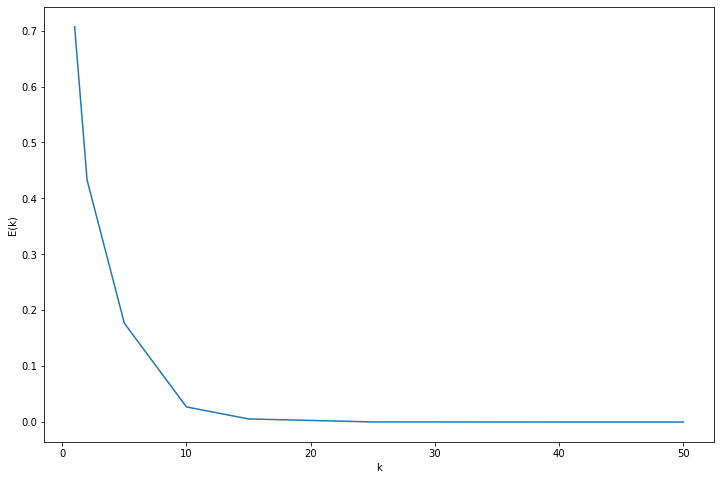

In [59]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(k, Ek)
ax1.set_xlabel('k')
ax1.set_ylabel('E(k)')
plt.show()

In [41]:
def linear(x, a, b):
    return a*x + b

In [57]:
popt, pcov = curve_fit(linear, k, np.log(Ek))
print(popt)

[-0.3482933  -0.04010598]


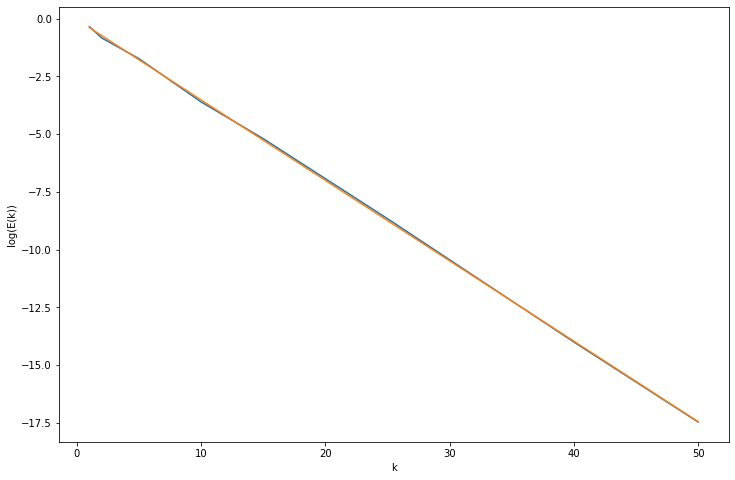

In [56]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(k, np.log(Ek))
ax2.plot(k, k*popt[0]+popt[1])
ax2.set_xlabel('k')
ax2.set_ylabel('log(E(k))')
plt.show()

In [61]:
print(np.exp(popt[0]))

0.7058918111406506


In [63]:
print(eigvals[np.where(eigvals!=1.)].max())

0.7071067811865474
